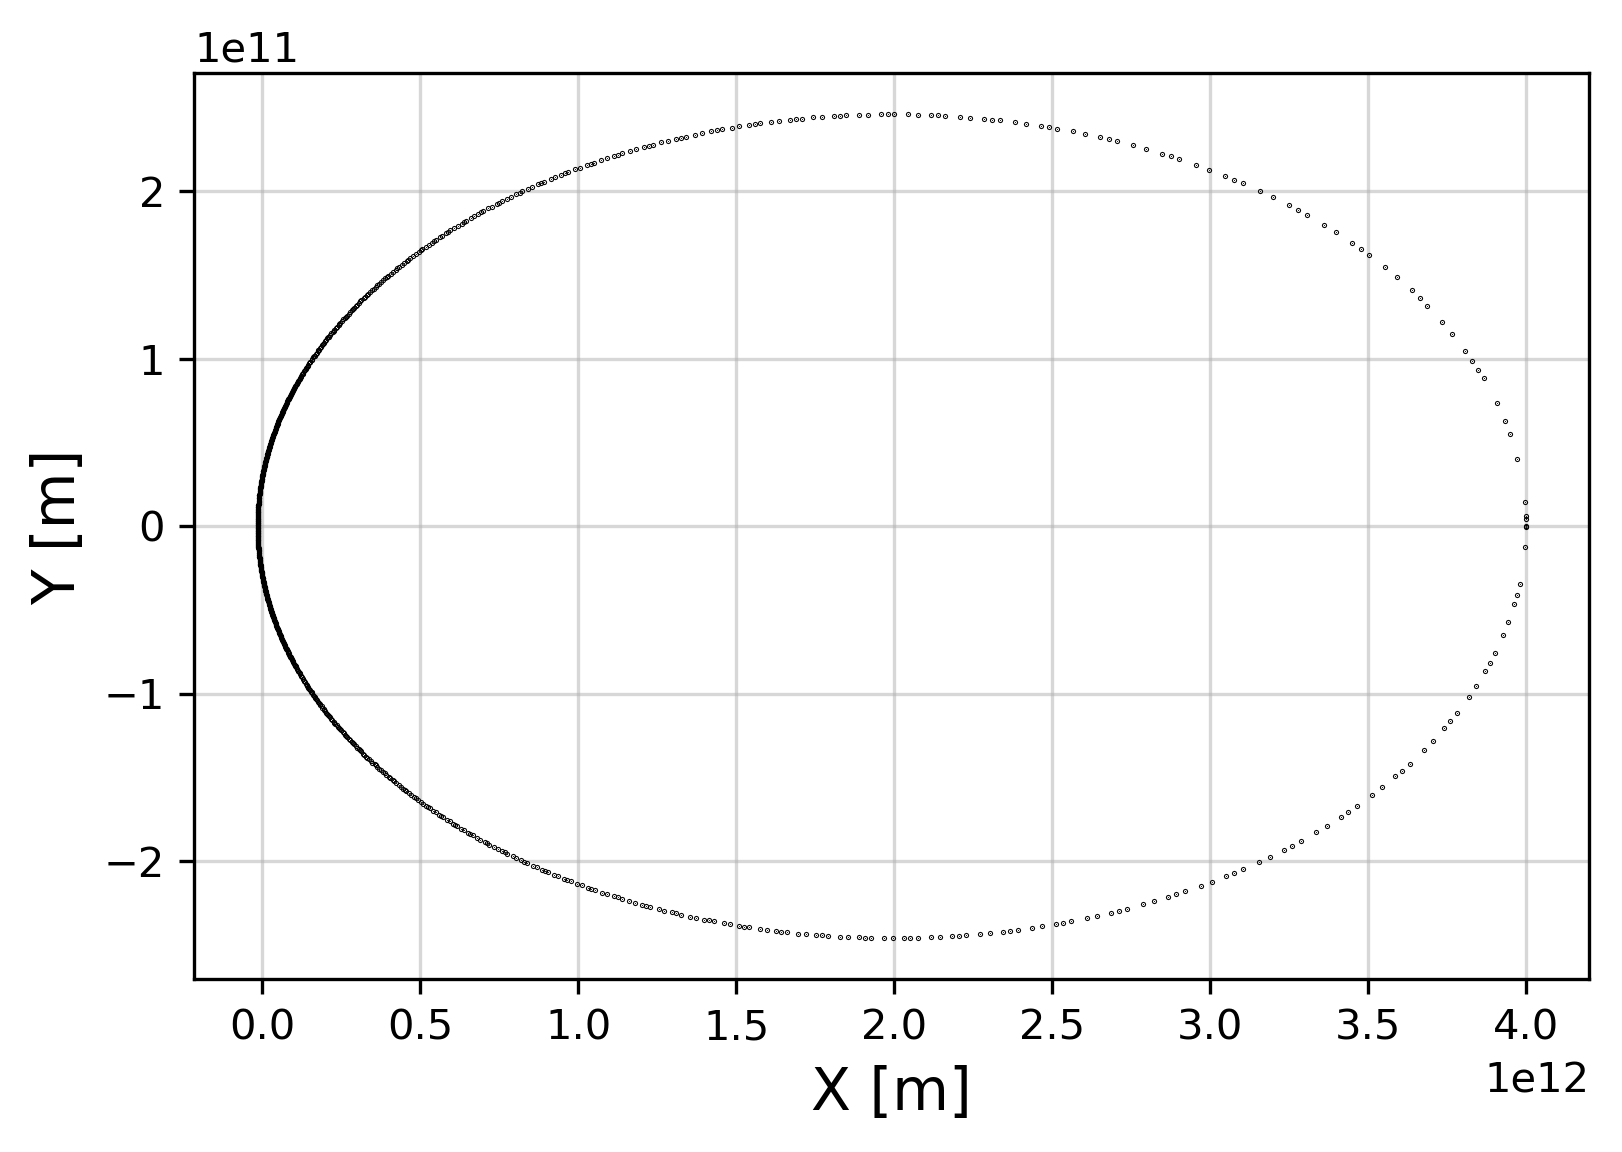

O tempo de execução foi de 5.643 segundos.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time

G = 6.67e-11      #[m^3 k^-1 s^-2]
M = 1.99e30       #[Kg]

def F(r):
    x, y = r[0,:]
    v_x, v_y = r[1,:]
    
    Dx = v_x
    Dy = v_y

    R = np.sqrt(x**2 + y**2)

    Dv_x = -G*M*x/R**3
    Dv_y = -G*M*y/R**3
    return np.array([[Dx,Dy],[Dv_x,Dv_y]],float)

def RK(F,r0,h):
    r = r0.copy()
    k1 = h*F(r)
    k2 = h*F(r + 0.5*k1)
    k3 = h*F(r + 0.5*k2)
    k4 = h*F(r + k3)
    r += (k1 + 2*k2 + 2*k3 + k4)/6
    return r

def Adapt_h(r11,r2,err,h):
    epsx = (r11[0,0] - r2[0,0])/30
    epsy = (r11[0,1] - r2[0,1])/30
    rho = h*err/np.hypot(epsx,epsy)
    return rho

start_time = time.time()

r0  = np.array([[4e12,0],[0,500]], float)    #SI
x   = np.array([r0[0,0]])
y   = np.array([r0[0,1]])

#intervalo de tempo
T = np.sqrt(4*np.pi**2*r0[0,0]**3/(G*M))
a = 0
b = 2*T

h   = (b-a)/1e3
err = 1e6/(365*24*3600) #[m/s]

pos = a
while pos < b:
    r1  = RK(F,r0,h)
    r11 = RK(F,r1,h)
    r2  = RK(F,r0,2*h)
        
    rho = Adapt_h(r11,r2,err,h)
    h = h*(rho**(1/4))
    
    if rho >= 1:
        x = np.append(x, r1[0,0])
        y = np.append(y, r1[0,1])
        r0 = r1.copy()
        pos += h

    if rho < 1:
        continue

plt.figure(dpi = 300)
plt.plot(x, y, '.k', markersize = 0.5)
plt.grid(alpha = 0.5)
plt.xlabel("X [m]", size = 14)
plt.ylabel("Y [m]", size = 14)
plt.savefig('im_8_10b1')
plt.show()

print("O tempo de execução foi de %.3f segundos." %((time.time() - start_time)))